### Style Transfer style and content wegith example

IsADirectoryError: [Errno 21] Is a directory: '../documentation/report/images/'

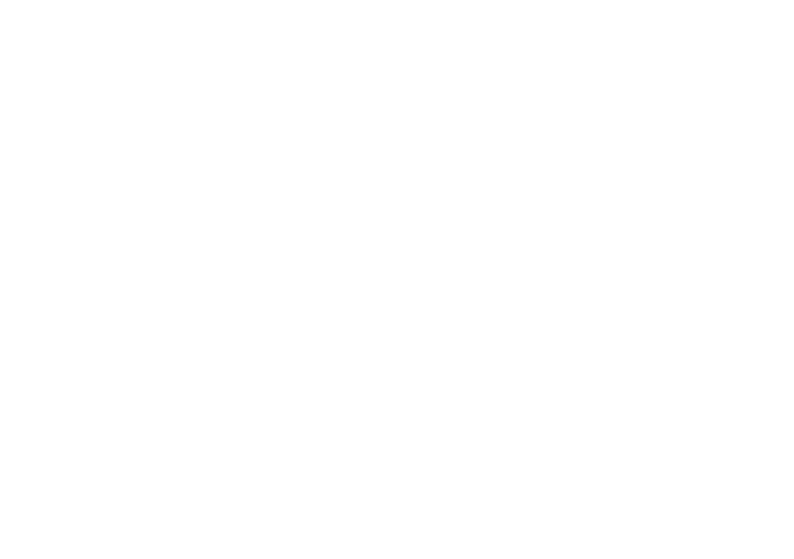

In [3]:
import matplotlib.pyplot as plt
from matplotlib.ticker import NullLocator
from PIL import Image
import os

os.chdir('/home/joseca/mat099/notebooks/')
picDir = '../documentation/report/images/'

# Replace these paths with the paths to your images


# loaded_pic = Image.open(pic_dir).convert('RGB')
# crop_pic = PRNUProcessor.cut_ctr(np.array(loaded_pic), (512, 512, 3))

image_paths = [
    'st_low.png'
    ,'st_low2.png'
    ,'st_low3.png'
    ,'st_med.png'
    ,'st_high.png'
]
captions = [
    'Original'
    ,'Style 1e-9 Content 1e11'
    ,'Style 1e-6 Content 1e9'
    ,'Style 1e-7 Content 1e10'
    ,'Style 1e-3 Content 1e3'
    ,'Style 0.9 Content 1e4' 
]

#image_paths = ['/mnt/669118d5-25c6-4d9a-9660-2787d5d59e99/vision_dataset/nat/D01_I_0002.jpg'] + [picDir + path for path in image_paths]

fig, axes = plt.subplots(2, 3, figsize=(10, 7))
fig.subplots_adjust(hspace=0.5)  

for ax in axes.flatten():
    ax.axis("off")
    ax.xaxis.set_major_locator(NullLocator())
    ax.yaxis.set_major_locator(NullLocator())

# Add images and captions
for i, (ax, path) in enumerate(zip(axes.flatten(), image_paths), 1):
    if captions[i-1] == 'Original':
        loaded_pic = Image.open(picDir).convert('RGB')
        img = PRNUProcessor.cut_ctr(np.array(loaded_pic), (512, 512, 3))
    else:
        img = plt.imread(path)
    ax.imshow(img)
    ax.set_title(captions[i-1], fontsize=10, pad=10)

plt.tight_layout()

plt.savefig(picDir + 'style_content_weights.png')

plt.show()


### Noise extraction example

In [1]:
import os
from classes import *

ModuleNotFoundError: No module named 'classes'

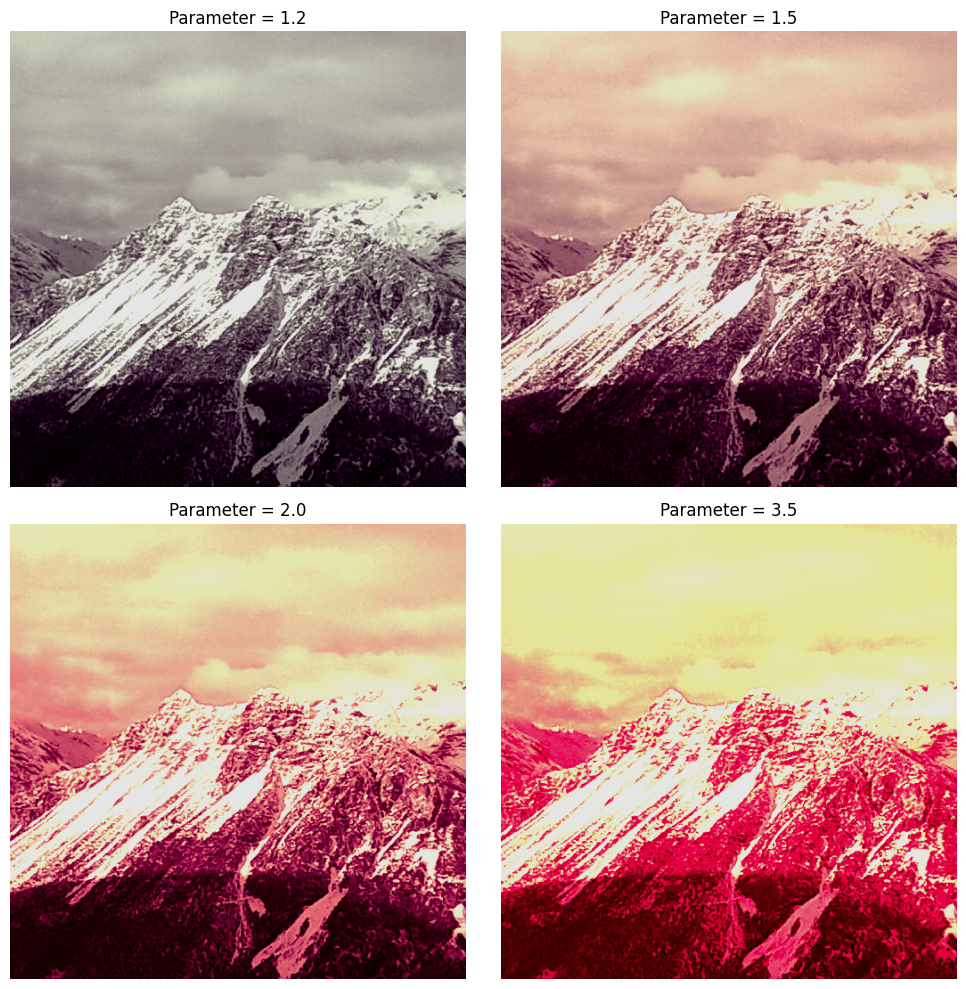

In [31]:

import os
from classes import PRNUProcessor, ImageProcessor
from PIL import Image
from matplotlib import pyplot as plt

# Set the working directory
os.chdir('/home/joseca/mat099/')

pic_dir = '/mnt/669118d5-25c6-4d9a-9660-2787d5d59e99/vision_dataset/nat/D01_I_0002.jpg'
loaded_pic = Image.open(pic_dir).convert('RGB')

crop_pic = PRNUProcessor.cut_ctr(np.array(loaded_pic), (512, 512, 3))
crop_pic = Image.fromarray(crop_pic)

parameter_values = [1.2, 1.5, 2.0, 3.5]

fig, axs = plt.subplots(2, 2, figsize=(10, 10))

for i in range(2):
    for j in range(2):
        img = ImageProcessor.apply_sierra(crop_pic, parameter_values[i * 2 + j])

        axs[i, j].imshow(img)
        axs[i, j].axis('off') 
        axs[i, j].set_title(f'Parameter = {parameter_values[i * 2 + j]}')

plt.tight_layout()
plt.savefig('documentation/report/images/sierra_parameters.png')
plt.show()


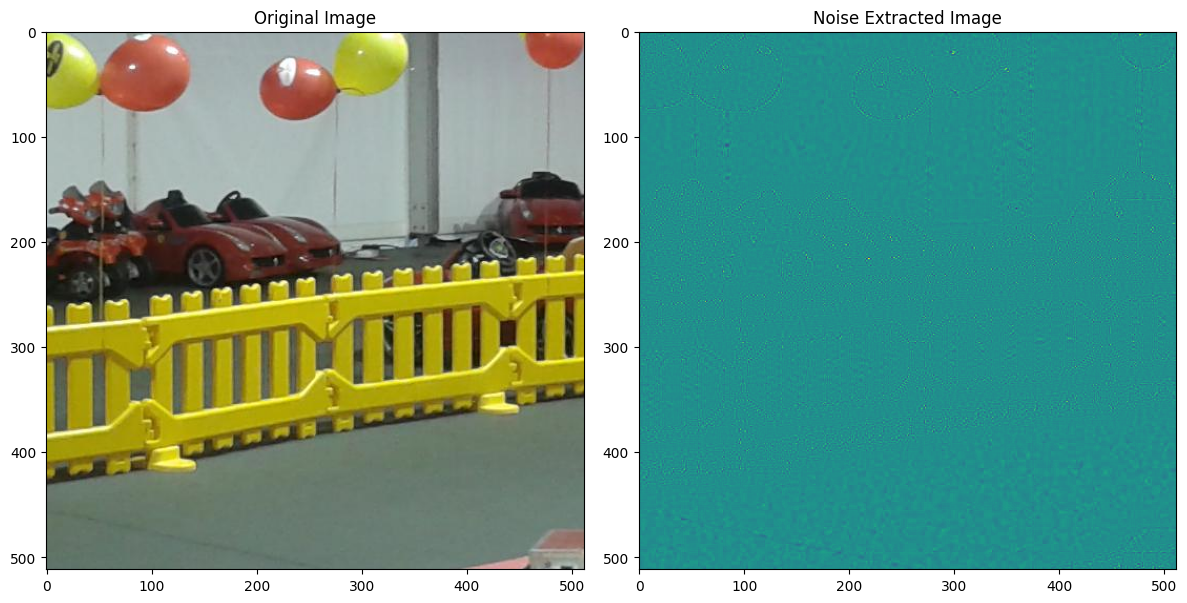

In [38]:
# Noise extraction

import os
from classes import PRNUProcessor, ImageProcessor
from PIL import Image
from matplotlib import pyplot as plt

# Set the working directory
os.chdir('/home/joseca/mat099/')

pic_dir = '/mnt/669118d5-25c6-4d9a-9660-2787d5d59e99/vision_dataset/nat/D01_I_0168.jpg'
loaded_pic = Image.open(pic_dir).convert('RGB')

img = np.array(loaded_pic)
img = PRNUProcessor.cut_ctr(img, (512, 512, 3))
noise_img = PRNUProcessor.extract_single(img)

imgs = [img, noise_img]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(imgs[0])
axs[0].set_title('Original Image')

axs[1].imshow(imgs[1])
axs[1].set_title('Noise Extracted Image')

plt.tight_layout()
plt.savefig('documentation/report/images/noise_extract_example.png')
plt.show()

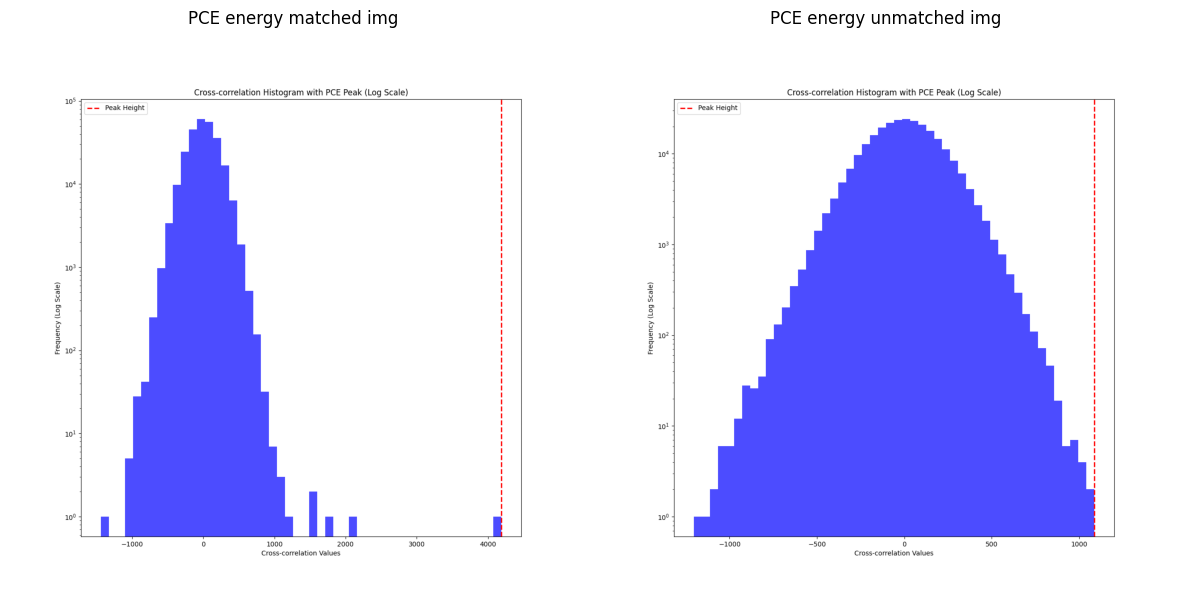

In [7]:
import os
from classes import PRNUProcessor, ImageProcessor
from PIL import Image
from matplotlib import pyplot as plt

# hist1 = 'documentation/report/images/histogram_raw_match.png'
# hist2 = 'documentation/report/images/histogram_style_transfer_med.png'

hist1 = 'documentation/report/images/hist_match.png'
hist2 = 'documentation/report/images/hist_no_match.png'

imgs = [
    Image.open(hist1).convert('RGB'),
    Image.open(hist2).convert('RGB')
]

fig, axs = plt.subplots(1, 2, figsize=(12, 6))

axs[0].imshow(imgs[0])
axs[0].set_title('PCE energy matched img')
axs[0].axis('off') 

axs[1].imshow(imgs[1])
axs[1].set_title('PCE energy unmatched img')
axs[1].axis('off')  

plt.tight_layout()
plt.savefig('documentation/report/images/histogram_examples.png')
plt.show()


## Apply different filters

2023-12-22 19:23:06.190009: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-22 19:23:06.223336: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-22 19:23:06.224422: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-22 19:23:06.970523: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


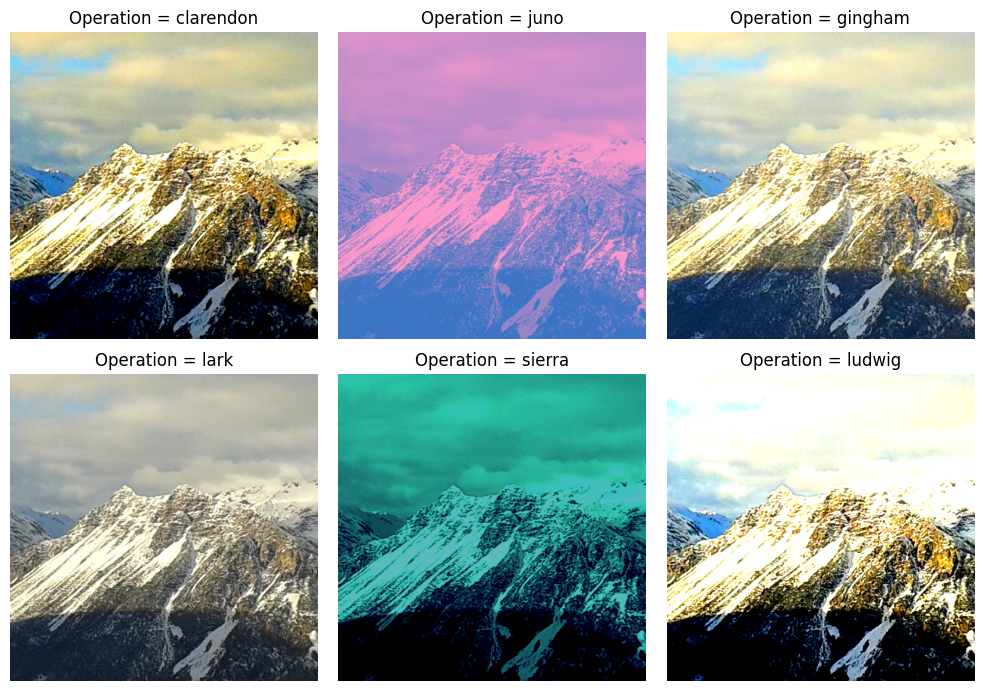

In [1]:
import os
import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

# Set the working directory
os.chdir('/home/joseca/mat099/')
from classes import PRNUProcessor, ImageProcessor

# Load the image
pic_dir = '/mnt/669118d5-25c6-4d9a-9660-2787d5d59e99/vision_dataset/nat/D01_I_0002.jpg'
loaded_pic = Image.open(pic_dir).convert('RGB')

# Crop the image
crop_pic = PRNUProcessor.cut_ctr(np.array(loaded_pic), (512, 512, 3))
crop_pic = Image.fromarray(crop_pic)

def applyFilter(operationNum, im, intensity):
    if operationNum == 0:
        return ImageProcessor.apply_clarendon(im, intensity)
    elif operationNum == 1:
        return ImageProcessor.apply_juno(im, intensity)
    elif operationNum == 2:
        return ImageProcessor.apply_gingham(im, intensity)
    elif operationNum == 3:
        return ImageProcessor.apply_lark(im, intensity)
    elif operationNum == 4:
        return ImageProcessor.apply_sierra(im, intensity)
    elif operationNum == 5:
        return ImageProcessor.apply_ludwig(im, intensity)

operations = ['clarendon', 'juno', 'gingham', 'lark', 'sierra', 'ludwig']
intensities = [1.0, 1.0, 1.4, 0.8, 1.0, 1.25]

fig, axs = plt.subplots(2, 3, figsize=(10, 7))  # Change to 2x3 grid

operation_count = 0
for i in range(2):
    for j in range(3):
        img = applyFilter(operation_count, crop_pic, intensities[operation_count])
        operation_count += 1

        axs[i, j].imshow(img)
        axs[i, j].axis('off') 
        axs[i, j].set_title(f'Operation = {operations[operation_count - 1]}')

plt.subplots_adjust(wspace=0.1)  
plt.tight_layout()
plt.savefig('documentation/report/images/filter_operations.png')
plt.show()
